In [1]:
import numpy as np
import matplotlib.pyplot as plt

def gaussian_rbf(x, landmark, gamma=1):
    """
    Computes the Gaussian Radial Basis Function (RBF) kernel value.
    This serves as the kernel function to map data to a higher-dimensional space.
    """
    return np.exp(-gamma * np.linalg.norm(x - landmark)**2)

In [2]:
def end_to_end(X1, X2, ys, mu1, mu2):

    from_1 = [gaussian_rbf(np.array([X1[i], X2[i]]), mu1) for i in range(len(X1))]
    from_2 = [gaussian_rbf(np.array([X1[i], X2[i]]), mu2) for i in range(len(X1))]
    plt.figure(figsize=(13, 5))


    plt.subplot(1, 2, 1)
    plt.scatter((X1[0], X1[3]), (X2[0], X2[3]), label="Class_0 ($0 \text{ XOR } 0$ and $1 \text{ XOR } 1$)", color='blue')
    plt.scatter((X1[1], X1[2]), (X2[1], X2[2]), label="Class_1 ($0 \text{ XOR } 1$ and $1 \text{ XOR } 0$)", color='red')
    plt.xlabel("$X1$", fontsize=15)
    plt.ylabel("$X2$", fontsize=15)
    plt.title("Xor: Linearly Inseparable in Original $\mathbb{R}^2$", fontsize=15)
    plt.legend()
    plt.grid(True)


    plt.subplot(1, 2, 2)
    plt.scatter(from_1[0], from_2[0], label="Class_0", color='blue', s=100)
    plt.scatter(from_1[1], from_2[1], label="Class_1", color='red', s=100)
    plt.scatter(from_1[2], from_2[2], label="Class_1", color='red', s=100)
    plt.scatter(from_1[3], from_2[3], label="Class_0", color='blue', s=100)


    plt.plot([0, 0.95], [0.95, 0], "k--")
    plt.annotate("Seperating Hyperplane", xy=(0.4, 0.55), xytext=(0.55, 0.66),
                 arrowprops=dict(facecolor='black', shrink=0.05))

    plt.xlabel(f"New Feature 1 (RBF to $\mu_1$: {mu1})", fontsize=12)
    plt.ylabel(f"New Feature 2 (RBF to $\mu_2$: {mu2})", fontsize=12)
    plt.title("Transformed Inputs: Linearly Separable $\Phi(\mathbf{X})$", fontsize=15)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


    A = []
    for i, j in zip(from_1, from_2):
        temp = []
        temp.append(i)
        temp.append(j)
        temp.append(1)
        A.append(temp)

    A = np.array(A)
    # Solve for weights W using the Normal Equation: W = (A^T A)^-1 A^T y
    W = np.linalg.inv(A.T.dot(A)).dot(A.T).dot(ys)

    # Print results
    print("\n--- Model Evaluation ---")
    print(f"Predicted outputs (rounded): {np.round(A.dot(W))}")
    print(f"True outputs:                {ys}")
    print(f"Weights (W):                 {W}")
    return W

<>:16: SyntaxWarning: invalid escape sequence '\m'
<>:32: SyntaxWarning: invalid escape sequence '\m'
<>:33: SyntaxWarning: invalid escape sequence '\m'
<>:34: SyntaxWarning: invalid escape sequence '\P'
<>:16: SyntaxWarning: invalid escape sequence '\m'
<>:32: SyntaxWarning: invalid escape sequence '\m'
<>:33: SyntaxWarning: invalid escape sequence '\m'
<>:34: SyntaxWarning: invalid escape sequence '\P'
/tmp/ipython-input-2324448179.py:16: SyntaxWarning: invalid escape sequence '\m'
  plt.title("Xor: Linearly Inseparable in Original $\mathbb{R}^2$", fontsize=15)
/tmp/ipython-input-2324448179.py:32: SyntaxWarning: invalid escape sequence '\m'
  plt.xlabel(f"New Feature 1 (RBF to $\mu_1$: {mu1})", fontsize=12)
/tmp/ipython-input-2324448179.py:33: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel(f"New Feature 2 (RBF to $\mu_2$: {mu2})", fontsize=12)
/tmp/ipython-input-2324448179.py:34: SyntaxWarning: invalid escape sequence '\P'
  plt.title("Transformed Inputs: Linearly Separable

In [3]:
def predict_matrix(point, weights):
    """
    Predicts the class of a single 2D input point by:
    1. Applying the RBF kernel (transformation).
    2. Multiplying the transformed features by the learned weights.
    3. Rounding the result to get the binary class (0 or 1).
    """
    gaussian_rbf_0 = gaussian_rbf(point, mu1)
    gaussian_rbf_1 = gaussian_rbf(point, mu2)


    A = np.array([gaussian_rbf_0, gaussian_rbf_1, 1])

    return np.round(A.dot(weights))

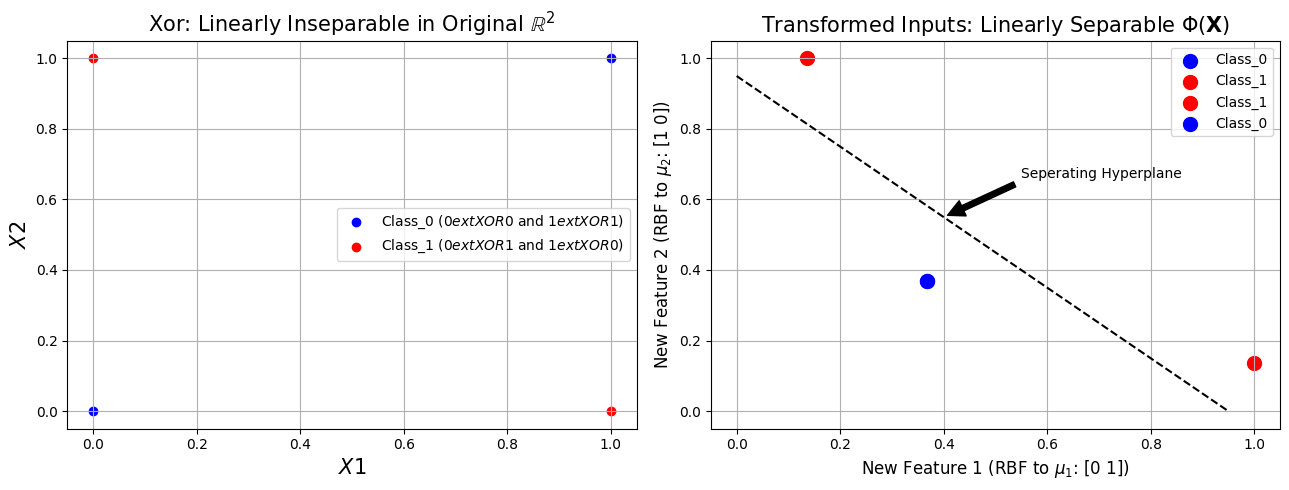


--- Model Evaluation ---
Predicted outputs (rounded): [0. 1. 1. 0.]
True outputs:                [0 1 1 0]
Weights (W):                 [ 2.5026503   2.5026503  -1.84134719]

--- Testing Predictions on Training Data ---
Input:[0 0], Predicted: 0.0
Input:[0 1], Predicted: 1.0
Input:[1 0], Predicted: 1.0
Input:[1 1], Predicted: 0.0


In [4]:

x1 = np.array([0, 0, 1, 1])
x2 = np.array([0, 1, 0, 1])
ys = np.array([0, 1, 1, 0]) # XOR output (0, 1, 1, 0)


mu1 = np.array([0, 1])
mu2 = np.array([1, 0])


w = end_to_end(x1, x2, ys, mu1, mu2)


print("\n--- Testing Predictions on Training Data ---")
print(f"Input:{np.array([0, 0])}, Predicted: {predict_matrix(np.array([0, 0]), w)}")
print(f"Input:{np.array([0, 1])}, Predicted: {predict_matrix(np.array([0, 1]), w)}")
print(f"Input:{np.array([1, 0])}, Predicted: {predict_matrix(np.array([1, 0]), w)}")
print(f"Input:{np.array([1, 1])}, Predicted: {predict_matrix(np.array([1, 1]), w)}")